'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


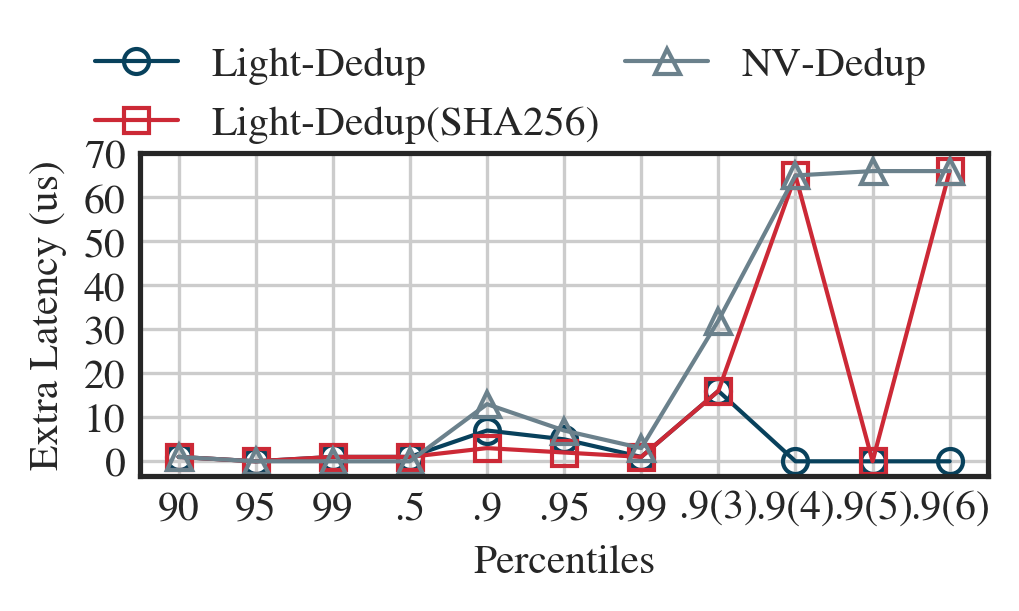

In [23]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# with open("./avg-test-result-multi-in-paper", "r") as f:
with open("./table-calculated", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, engine='python')

# sort_dict = {
#     "Speculation-64": 0, 
#     "Prefetch-Next": 1,
#     "Transition": 2,
#     "Naive": 3
# }

# sort_df = pd.DataFrame(df['file_system'].map(sort_dict))
# sort_df["num_job"] = df['num_job']
# df = df.iloc[sort_df.sort_values(by = ["file_system", "num_job"]).index]

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4.5)))
# bar_width = 0.35
# subfig_titles = ["(a) 1 Thread", "(b) 2 Threads", "(c) 4 Threads", "(d) 8 Threads", "(e) 16 Threads"]
# patterns = ['///', '\\\\\\', '', 'XXX', "OOO"]
# Reference: https://designbro.com/blog/inspiration/color-combinations/
tail_latency_percentiles = ["90", "95", "99", ".5", ".9", ".95", ".99", ".9(3)",".9(4)", ".9(5)", ".9(6)"]
line_width = 2
colors = ["#08415c", "#cc2936", "#6b818c"]
marks = ["o", "s", "^"]
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
tail_latency_percentile = list(range(1, len(tail_latency_percentiles) + 1))

for idx, fs in enumerate(fss):
    # print(tail_latency_percentile)
    # print(df[df['file_system'] == fs].iloc[:, 3 :  4 +len(tail_latency_percentiles)].iloc[0])
    plt.plot(tail_latency_percentile, df[df['file_system'] == fs].iloc[:, 3 : 4+len(tail_latency_percentiles)].iloc[0], color=colors[idx], markerfacecolor='none', linewidth=1, label=fs, marker=marks[idx], markeredgecolor=colors[idx])

plt.xticks(tail_latency_percentile, labels=tail_latency_percentiles)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
fig.legend(fss, loc='center', ncol=2, bbox_to_anchor=(0.5, 1), columnspacing = 0.6)
plt.ylabel("Extra Latency (us)")
plt.xlabel("Percentiles")

plt.tight_layout()
plt.savefig("./FIG-Tail-Latency.pdf", bbox_inches='tight', pad_inches=0)